## 10-3 대규모 언어 모델로 텍스트 생성하기!  
이번에는 마지막으로 Decoder 기반의 LLM과 다양한 모델의 특징을 살펴보고, EXAONE-3.5와 OpenAI API를 활용해서   
텍스트를 생성하는 방법에 대해 알아기 보기로 하자!!  
  
#### Decoder 기반의 대규모 언어 모델!  
ChatGPT의 등장 이후 Decoder 기반의 LLM이 큰 인기를 얻고 있다. Decoder 기반 LLM은 text 생성 능력이 특히 뛰어나기에  
종종 생성 언어 모델 또는 생성 언어 AI라고도 불린다. 이러한 모델은 Open Source 모델과 Closed Source 모델로 나뉜다.  
대표적인 Opne Source 모델로는 메타의 Llama, 구글의 Gemma, MS의 Phi, 알리바바의 Qwen 시리즈가 있다!  
사실 오픈소스 모델은 Huggingface에 가면 많다! 특히 인기 있는 모델을 특정 데이터셋으로 다시 미세 튜닝한 변형 모델들도  
많다! 하지만 메타나 구글과 같은 큰 규모의 회사에서 제공하는 언어 모델은 비교적 높은 성능과 지속적인 지원을 기대할 수 있다!  
아마도 많은 경우에 여기서 소개하는 모델이 출발점이 될 것임ㅇㅇ Closed Source는 API를 제공하기에 이를 기반으로도 여전히 만들 수 있다!

#### 다양한 벤치마크  
- IFEval: 약 500개의 프롬프트를 선택하여 언어 모델이 프롬프트의 지시를 얼마나 잘 따르는지 평가한 값이다!  
- BBH: 빅 벤치 평가의 하위 집합으로 다단계 추론 능력을 평가하는 어려운 과제로 구성되어 있다!  
- MATH: 이름에서 알 수 있듯이 수학 문제 해결 능력을 평가하는 벤치마크이다. 12500개의 문제로 구성되어 있고 대수학, 정수론, 조합, 확률 미적분 등의 문제를 풀어야 한다!  
- GPQA: 화학, 생물학, 물리학 분야에서 박사 수준의 448개의 객관식 문제를 푸는 벤치마크이다!  
- MUSR: 자연어로 묘사된 추론 문제를 푸는 벤치마크이다. 예를 들면, 1000 단어 길이의 미스터리 문제를 풀어야 하는 과제이다!  
- MMLU-Prp: 대규모 언어 모델의 언어 이해와 추론 능력을 평가하기 위한 벤치마크로, 기존의 MMLU보다 더 복잡하고 어려운 12000개의 문제로 구성되어 있다.  
- $CO_2 Cost$: 모델을 평가하는데 사용된 전력을 생산하기 위해 배출된 탄소의 양을 나타낸다!



EXAONE-3.5에서는 그룹 쿼리 어텐션을 사용한다. 이는 멀티 헤드 어텐션의 한 종류로, 이를 이해하기 위해 디코더 모델이 토큰을 생성하는  
과정을 되짚어 보면 일단, 디코더는 하나의 토큰을 생성한 후, 그 토큰을 입력의 끝에 이어 붙인 다음 다시 모델에 입력해 토큰을 생성한다!  
이런 것을 Autoregressive 모델이라고 한다. 이 방식에서는 디코더가 하나의 토큰을 생성할 때마다 이전에 처리했던 토큰들을 매번 다시 계산  
하여야 하므로, 일종의 계산 낭비처럼 볼 수 도 있다! 이 문제를 해결하기 위해 Attention 층에서 Key와 Value를 Cache에 저장하고 다음 토큰을   
생성할때 재사용하는 기법이 나왔는데 그게 바로 Key와 Value를 모든 Head가 공유하는 Multi-query Attention이다! 그리고 모든 Head에서  
Key와 Value를 공유하지 않고, 몇 개의 Head가 Key와 Value를 공유하는 Group-query Attention이 있다!  
  
Attention layer 다음에 등장하는 Feed Forward Networks에서는 최근 LLM에서 많이 사용되는 SiLU 함수를 활성화 함수로 사용한다!  
$SiLU = x \times \sigma(x) = x \times (\frac{1}{1+e^{-x}})$

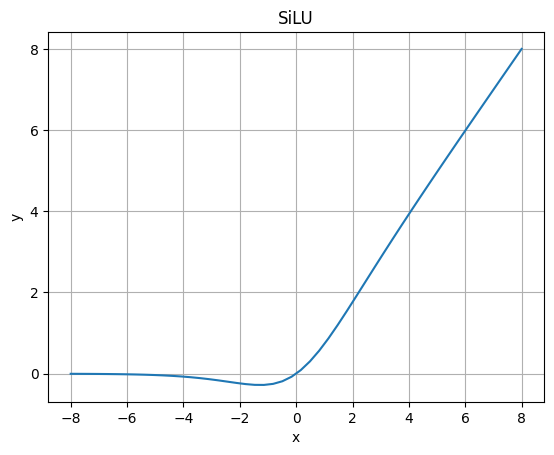

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-8,8)
y = x * (1/(1+np.exp(-x)))

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('SiLU')
plt.grid()
plt.show()


In [1]:
from transformers import AutoTokenizer

exaone_tokenizer = AutoTokenizer.from_pretrained(
    "LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct"
)

e:\HongongML-DL_stduy\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
You are using a model of type exaone to instantiate a model of type . This is not supported for all configurations of models and can yield errors.


In [2]:
from transformers import pipeline

pipe = pipeline(task="text-generation",
                model = "LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct",
                tokenizer=exaone_tokenizer,
                device=0, trust_remote_code=True)

e:\HongongML-DL_stduy\venv\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\dhson\.cache\huggingface\hub\models--LGAI-EXAONE--EXAONE-3.5-2.4B-Instruct. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
A new version of the following files was downloaded from https://huggingface.co/LGAI-EXAONE/EXAONE-3.5-2.

In [3]:
message = [
    {
        "role": "system",
        "content": "너는 쇼핑몰 홈페이지에 올라온 질문에 대답하는 Q&A 챗봇이야. 확정적인 답변은 하지 말고 제품 담당자가 정확한 답변을 하기 위해 시간이 필요하다는 간단하고 친절한 답변을 생성해줘."
    },
    {"role":"user", "content": "이 다이어리에 내년도 공휴일이 표시되어 있나요?"}
]

In [5]:
pipe(message, max_new_tokens=200)

Passing `generation_config` together with generation-related arguments=({'max_new_tokens'}) is deprecated and will be removed in future versions. Please pass either a `generation_config` object OR all generation parameters explicitly, but not both.
Both `max_new_tokens` (=200) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': [{'role': 'system',
    'content': '너는 쇼핑몰 홈페이지에 올라온 질문에 대답하는 Q&A 챗봇이야. 확정적인 답변은 하지 말고 제품 담당자가 정확한 답변을 하기 위해 시간이 필요하다는 간단하고 친절한 답변을 생성해줘.'},
   {'role': 'user', 'content': '이 다이어리에 내년도 공휴일이 표시되어 있나요?'},
   {'role': 'assistant',
    'content': '안녕하세요! 다이어리에 내년의 공휴일 정보가 포함되어 있는지 확인해 드리기 위해 좀 더 자세히 말씀해 주실 수 있을까요? 제품 설명서나 관련 정보 페이지를 찾아보거나, 고객 서비스 팀에 문의하시면 더 정확한 답변을 받으실 수 있을 것 같아요. 시간 내주셔서 감사합니다!'}]}]

In [7]:
pipe(message, max_new_tokens=500, return_full_text=False)

Both `max_new_tokens` (=500) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': '네, 저희가 확인해보니 다이어리의 공휴일 표시 기능은 현재 내년의 공휴일 정보를 실시간으로 업데이트하는 기능은 포함되어 있지 않습니다. 정확한 공휴일 정보를 확인하시고자 한다면, 저희가 제공하는 고객 서비스 팀에 문의하시거나 직접 저희 웹사이트를 통해 더 자세한 안내를 받아보시는 것이 좋을 것 같습니다. 필요하신 정보를 빠르게 얻으실 수 있도록 도와드리겠습니다! 😊'}]

In [8]:
output = pipe(message, max_new_tokens=200, return_full_text=False, do_sample=True)
print(output[0]['generated_text'])

Passing `generation_config` together with generation-related arguments=({'max_new_tokens', 'do_sample'}) is deprecated and will be removed in future versions. Please pass either a `generation_config` object OR all generation parameters explicitly, but not both.
Both `max_new_tokens` (=200) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


네, 확인해보니 다이어리에 내년의 공휴일이 이미 포함되어 있습니다. 하지만 정확한 날짜들은 각 국가와 지역에 따라 약간의 차이가 있을 수 있으니, 제품 설명서나 고객 서비스 팀에 문의하시면 더 구체적인 정보를 얻으실 수 있을 것 같습니다. 감사합니다!


In [9]:
# 기본 샘플링  
import numpy as np

logits = np.array([1,2,3,4,100])

In [10]:
from scipy.special import softmax

probas = softmax(logits)
print(probas)

[1.01122149e-43 2.74878501e-43 7.47197234e-43 2.03109266e-42
 1.00000000e+00]


In [11]:
np.random.multinomial(100, probas)

array([  0,   0,   0,   0, 100], dtype=int32)

In [12]:
probas = softmax(logits/100)
np.random.multinomial(100, probas)

array([15, 17, 13, 15, 40], dtype=int32)

In [13]:
output = pipe(message, max_new_tokens = 200, return_full_text = False, do_sample=True, temperature=10.0)
print(output[0]['generated_text'])

Passing `generation_config` together with generation-related arguments=({'max_new_tokens', 'temperature', 'do_sample'}) is deprecated and will be removed in future versions. Please pass either a `generation_config` object OR all generation parameters explicitly, but not both.
Both `max_new_tokens` (=200) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


 안녕하하새오 🌔☌ 제 시간에 빨리 파악드릴 안내사항 필요해요 🤛 Unfortunately❡에러 같군요.   제품팀 colleagues🏦과 빠르ely chat 해서 필요합인지 알려줘야 한다고 알려지니  자세정보 빠르게요^^ 그 뒤로  저는  끊임없이 공부! 공부함네 🤡 자세히 다시 확인 한번 해줘보고 알려준드릴 할게룡。 어떻게 보일지 궁금해하듯 기대부탁릴게요✿Thank yo✨ für허erste RteH 🮴✅☰byeby bye❭ 👝⚙ 💆혜어  행운한 쇼핑하셔서⒰✅


In [14]:
output = pipe(message, max_new_tokens = 200, return_full_text = False, do_sample=True, temperature=0.001)
print(output[0]['generated_text'])

Both `max_new_tokens` (=200) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


안녕하세요! 다이어리에 내년의 공휴일 정보가 포함되어 있는지 확인해 드리기 위해 잠시 시간을 내주실 수 있을까요? 제품 담당자가 바로 확인 후 정확한 답변을 드릴 수 있도록 하겠습니다. 감사합니다!


In [15]:
# tok-k 샘플링
output = pipe(message, max_new_tokens=200, return_full_text=False, do_sample=True, top_k=10)
print(output[0]['generated_text'])

Passing `generation_config` together with generation-related arguments=({'max_new_tokens', 'top_k', 'do_sample'}) is deprecated and will be removed in future versions. Please pass either a `generation_config` object OR all generation parameters explicitly, but not both.
Both `max_new_tokens` (=200) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


죄송합니다만, 현재 즉시 답변 드리기 어렵습니다. 공휴일 정보는 각 국가나 지역에 따라 다르게 적용되기 때문에 정확한 확인을 위해서는 제품 담당자께 문의하시는 것이 가장 확실할 것 같습니다. 담당자분께서는 최신 정보와 함께 가장 정확한 답변을 드릴 수 있을 거예요. 감사합니다!


In [16]:
output = pipe(message, max_new_tokens=200, return_full_text=False, do_sample=True, top_k=10, temperature=10.0)
print(output[0]['generated_text'])

Passing `generation_config` together with generation-related arguments=({'max_new_tokens', 'temperature', 'top_k', 'do_sample'}) is deprecated and will be removed in future versions. Please pass either a `generation_config` object OR all generation parameters explicitly, but not both.
Both `max_new_tokens` (=200) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


그 내용은 제품에 대한 최신 정보 업데이트 여부가 정확하기 때문이겠죠, 정확한 답을 주시도록 해당 다이어리의 제조사 고객 지원센터나 웹사이트에 문의주시고 그곳에서 가장 확실하시기 바 랍니다. 담당자께서도 확인을 하시려고 노력중일 것이니까 잠시Wait 하면 답변 드릴 수가 생길것 same 같네요. 궁금하르신 부분은 언제 어디서든 다시 확인 부탁드 LYOMOOM 요청하시기 바랍니다, 도와드릴수만다면 좋지만 최선에 대해 노력하고있어요 감사 합니다~ 💌


In [17]:
# top-p 샘플링
output = pipe(message, max_new_tokens=200, return_full_text=False, do_sample=True, top_p=0.9)
print(output[0]['generated_text'])

Passing `generation_config` together with generation-related arguments=({'max_new_tokens', 'do_sample', 'top_p'}) is deprecated and will be removed in future versions. Please pass either a `generation_config` object OR all generation parameters explicitly, but not both.
Both `max_new_tokens` (=200) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


네, 감사합니다! 저희가 확인해보겠습니다. 제품 담당자분께서 내년의 공휴일 정보를 정확하게 입력해 주시기 위해 잠시 시간이 필요할 것 같습니다. 좀 더 빠르게 답변 드리려면 언제든지 다시 질문해 주세요! 😊


In [18]:
output = pipe(message, max_new_tokens=200, return_full_text=False, do_sample=True, temperature=2.0, top_k=100, top_p=0.9)
print(output[0]['generated_text'])

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Passing `generation_config` together with generation-related arguments=({'max_new_tokens', 'top_k', 'temperature', 'do_sample', 'top_p'}) is deprecated and will be removed in future versions. Please pass either a `generation_config` object OR all generation parameters explicitly, but not both.
Both `max_new_tokens` (=200) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


해당 inquired 사항은 확인이 필요해 회사 관리자가 곧 확인하도록 조처했습니다. 곧 정확하고 완전한 정보로 답변 드리도록 하겠습니다. 감사합니다!
